# Working with Panda Dataframe, based on tutorial provided by TensorFlow.

This tutorial uses a weather time series dataset recorded by the Max Planck Institute for Biogeochemistry.

This dataset contains 14 different features such as air temperature, atmospheric pressure, and humidity. These were collected every 10 minutes, beginning in 2003. For efficiency, you will use only the data collected between 2009 and 2016. This section of the dataset was prepared by François Chollet for his book Deep Learning with Python.

We will first begin by unzipping the file.

In [1]:
import zipfile

with zipfile.ZipFile('../day_03/Data/jena_climate_2009_2016.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('Data/jena_climate_2009_2016/')

We will be reading the csv file using panda dataframe

In [2]:
import pandas as pd

csv_path = 'Data/jena_climate_2009_2016/jena_climate_2009_2016.csv'
df = pd.read_csv(csv_path)

This tutorial will just deal with hourly predictions, so start by sub-sampling the data from 10-minute intervals to one-hour intervals:

In [3]:
print(df)

                  Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
0       01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90   
1       01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28   
2       01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31   
3       01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07   
4       01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04   
5       01.01.2009 01:00:00    996.50     -8.05    265.38        -8.78   
6       01.01.2009 01:10:00    996.50     -7.62    265.81        -8.30   
7       01.01.2009 01:20:00    996.50     -7.62    265.81        -8.36   
8       01.01.2009 01:30:00    996.50     -7.91    265.52        -8.73   
9       01.01.2009 01:40:00    996.53     -8.43    264.99        -9.34   
10      01.01.2009 01:50:00    996.62     -8.76    264.66        -9.66   
11      01.01.2009 02:00:00    996.62     -8.88    264.54        -9.77   
12      01.01.2009 02:10:00    996.63 

In [4]:
# Slice [start:stop:step], starting from index 5 take every 6th record. array-style slicing
df = df[5::6]
print(df)

                  Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
5       01.01.2009 01:00:00    996.50     -8.05    265.38        -8.78   
11      01.01.2009 02:00:00    996.62     -8.88    264.54        -9.77   
17      01.01.2009 03:00:00    996.84     -8.81    264.59        -9.66   
23      01.01.2009 04:00:00    996.99     -9.05    264.34       -10.02   
29      01.01.2009 05:00:00    997.46     -9.63    263.72       -10.65   
35      01.01.2009 06:00:00    997.71     -9.67    263.66       -10.62   
41      01.01.2009 07:00:00    998.33     -9.17    264.12       -10.10   
47      01.01.2009 08:00:00    999.17     -8.10    265.12        -9.05   
53      01.01.2009 09:00:00    999.69     -7.66    265.52        -8.84   
59      01.01.2009 10:00:00   1000.27     -7.04    266.10        -8.17   
65      01.01.2009 11:00:00   1000.87     -7.41    265.68        -8.66   
71      01.01.2009 12:00:00   1000.30     -6.87    266.27        -8.28   
77      01.01.2009 13:00:00   1000.03 

In [5]:
# Let's remove the datetime value and make it into a separate variable
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
print(date_time)

5        2009-01-01 01:00:00
11       2009-01-01 02:00:00
17       2009-01-01 03:00:00
23       2009-01-01 04:00:00
29       2009-01-01 05:00:00
35       2009-01-01 06:00:00
41       2009-01-01 07:00:00
47       2009-01-01 08:00:00
53       2009-01-01 09:00:00
59       2009-01-01 10:00:00
65       2009-01-01 11:00:00
71       2009-01-01 12:00:00
77       2009-01-01 13:00:00
83       2009-01-01 14:00:00
89       2009-01-01 15:00:00
95       2009-01-01 16:00:00
101      2009-01-01 17:00:00
107      2009-01-01 18:00:00
113      2009-01-01 19:00:00
119      2009-01-01 20:00:00
125      2009-01-01 21:00:00
131      2009-01-01 22:00:00
137      2009-01-01 23:00:00
143      2009-01-02 00:00:00
149      2009-01-02 01:00:00
155      2009-01-02 02:00:00
161      2009-01-02 03:00:00
167      2009-01-02 04:00:00
173      2009-01-02 05:00:00
179      2009-01-02 06:00:00
                 ...        
420371   2016-12-30 18:10:00
420377   2016-12-30 19:10:00
420383   2016-12-30 20:10:00
420389   2016-

In [6]:
print(df)

        p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
5         996.50     -8.05    265.38        -8.78   94.40          3.33   
11        996.62     -8.88    264.54        -9.77   93.20          3.12   
17        996.84     -8.81    264.59        -9.66   93.50          3.13   
23        996.99     -9.05    264.34       -10.02   92.60          3.07   
29        997.46     -9.63    263.72       -10.65   92.20          2.94   
35        997.71     -9.67    263.66       -10.62   92.70          2.93   
41        998.33     -9.17    264.12       -10.10   92.90          3.04   
47        999.17     -8.10    265.12        -9.05   92.80          3.31   
53        999.69     -7.66    265.52        -8.84   91.20          3.43   
59       1000.27     -7.04    266.10        -8.17   91.60          3.60   
65       1000.87     -7.41    265.68        -8.66   90.70          3.50   
71       1000.30     -6.87    266.27        -8.28   89.60          3.64   
77       1000.03     -5.8

To quickly examine the first few rows of the data, we can use the following command-df.head(). We can also use df.tail() to read the last five rows of the data.

In [7]:
df.tail()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420521,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7
420545,1000.11,-3.93,269.23,-8.09,72.60,4.56,3.31,1.25,2.06,3.31,1292.41,0.56,1.00,202.6


In [8]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
print(plot_features)

        T (degC)  p (mbar)  rho (g/m**3)
5          -8.05    996.50       1307.86
11         -8.88    996.62       1312.25
17         -8.81    996.84       1312.18
23         -9.05    996.99       1313.61
29         -9.63    997.46       1317.19
35         -9.67    997.71       1317.71
41         -9.17    998.33       1315.98
47         -8.10    999.17       1311.65
53         -7.66    999.69       1310.14
59         -7.04   1000.27       1307.76
65         -7.41   1000.87       1310.43
71         -6.87   1000.30       1306.98
77         -5.89   1000.03       1301.73
83         -5.94    999.81       1301.67
89         -5.69    999.88       1300.51
95         -5.40    999.94       1299.17
101        -5.37   1000.17       1299.27
107        -5.25   1000.16       1298.68
113        -5.11   1000.22       1298.07
119        -4.90   1000.22       1297.05
125        -4.80   1000.19       1296.45
131        -4.50   1000.00       1294.72
137        -4.47    999.77       1294.29
143        -4.54

Now, let's plot some of the data.

In [9]:
plot_features.index = date_time
print(plot_features)

                     T (degC)  p (mbar)  rho (g/m**3)
Date Time                                            
2009-01-01 01:00:00     -8.05    996.50       1307.86
2009-01-01 02:00:00     -8.88    996.62       1312.25
2009-01-01 03:00:00     -8.81    996.84       1312.18
2009-01-01 04:00:00     -9.05    996.99       1313.61
2009-01-01 05:00:00     -9.63    997.46       1317.19
2009-01-01 06:00:00     -9.67    997.71       1317.71
2009-01-01 07:00:00     -9.17    998.33       1315.98
2009-01-01 08:00:00     -8.10    999.17       1311.65
2009-01-01 09:00:00     -7.66    999.69       1310.14
2009-01-01 10:00:00     -7.04   1000.27       1307.76
2009-01-01 11:00:00     -7.41   1000.87       1310.43
2009-01-01 12:00:00     -6.87   1000.30       1306.98
2009-01-01 13:00:00     -5.89   1000.03       1301.73
2009-01-01 14:00:00     -5.94    999.81       1301.67
2009-01-01 15:00:00     -5.69    999.88       1300.51
2009-01-01 16:00:00     -5.40    999.94       1299.17
2009-01-01 17:00:00     -5.3

In [10]:
ax = plot_features.plot(subplots=True)

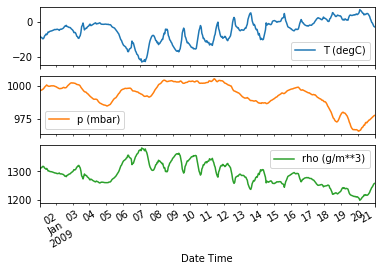

In [11]:
plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

An advantage of using panda dataframe is that we can quickly obtain the data statistics. This can be useful to spot for outliers within our data.

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


From our table above, we noticed that the wind speed (wv) and max. wv has unrealistic values (-9999). These outliers need to be removed from our data by substituting with an interpolated value.

In [13]:
# # Replacing bad values with zero
# # We will first identify the index of the bad data and then replace them with zero
# wv = df['wv (m/s)']
# bad_wv = wv == -9999.0
# wv[bad_wv] = # 0.0

# max_wv = df['max. wv (m/s)']
# bad_max_wv = max_wv == -9999.0
# max_wv[bad_max_wv] = 0.0

# # The above inplace edits are then reflected in the DataFrame.
# df['wv (m/s)'].min()

In [14]:
import numpy as np

# We need to first identify the index of the bad data
# Let's make a copy of the original data frame
wv = df['wv (m/s)']

# Then identify the indexes for the bad values
bad_wv = wv == -9999.0
wv.index = date_time
idx_bad = np.where(bad_wv==True)

In [15]:
# Datetime cooresponding to the bad values
bad_datetime = wv.iloc[idx_bad].index
bad_datetime

DatetimeIndex(['2015-07-13 10:00:00', '2015-07-13 11:00:00',
               '2015-07-13 12:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

In [16]:
# Let's remove the bad values from our array before creating our 1D interpolant
print('Initial length of the wv parameter:', len(wv))
wv = wv.drop(wv.iloc[idx_bad].index)
print('Length of the wv parameter after removal of bad data:', len(wv))

Initial length of the wv parameter: 70091
Length of the wv parameter after removal of bad data: 70088


In [17]:
wv.to_numpy()

array([0.21, 0.25, 0.18, ..., 0.71, 0.35, 0.56])

In [18]:
from scipy import interpolate

# Convert the datetime object to julian date
# The Julian day is the continuous count of days since the beginning of the Julian period, and is used primarily by astronomers, and in software for easily calculating elapsed days between two events (taken from wikipedia).
dt_juliandate = [dt.to_julian_date() for dt in wv.index]

# Generate 1D interpolant function
wv_interp_func_1D = interpolate.interp1d(dt_juliandate, wv.to_numpy())

In [19]:
# Interpolate to obtain the "correct" wv values for those period
wv_replace = wv_interp_func_1D(bad_datetime[:].to_julian_date())

In [20]:
# Replace the bad values with the interpolated values
df.iloc[idx_bad[0],df.columns.get_loc('wv (m/s)')] = wv_replace

In [21]:
# The wv for those index are no longer -9999.0
print(df.iloc[idx_bad[0],df.columns.get_loc('wv (m/s)')])

343583    5.7325
343589    5.3050
343595    4.8775
Name: wv (m/s), dtype: float64


In [22]:
# The above inplace edits are then reflected in the DataFrame.
print('The minimum wind speed is ',df['wv (m/s)'].min(),'m/s.')

The minimum wind speed is  0.0 m/s.


In [23]:
# We will be doing the same for the 'max. wv (m/s)' variable

# We need to first identify the index of the bad data
# Let's make a copy of the original data frame
max_wv = df['max. wv (m/s)']

# Then identify the indexes for the bad values
bad_max_wv = max_wv == -9999.0
max_wv.index = date_time
idx_bad = np.where(bad_max_wv==True)

# Datetime cooresponding to the bad values
bad_datetime = max_wv.iloc[idx_bad].index

# Let's remove the bad values from our array before creating our 1D interpolant
max_wv = max_wv.drop(max_wv.iloc[idx_bad].index)

# Convert the datetime object to julian date
# The Julian day is the continuous count of days since the beginning of the Julian period, and is used primarily by astronomers, and in software for easily calculating elapsed days between two events (taken from wikipedia).
dt_juliandate = [dt.to_julian_date() for dt in max_wv.index]

# Generate 1D interpolant function
max_wv_interp_func_1D = interpolate.interp1d(dt_juliandate, max_wv.to_numpy())

# Interpolate to obtain the "correct" wv values for those period
max_wv_replace = max_wv_interp_func_1D(bad_datetime[:].to_julian_date())

# Replace the bad values with the interpolated values
df.iloc[idx_bad[0],df.columns.get_loc('max. wv (m/s)')] = max_wv_replace

In [24]:
df.iloc[idx_bad[0],df.columns.get_loc('max. wv (m/s)')] 

343577    5.098
343583    5.956
343589    6.814
343595    7.672
Name: max. wv (m/s), dtype: float64

In [25]:
# The above inplace edits are then reflected in the DataFrame.
print('The minimum maximum wind speed is ',df['max. wv (m/s)'].min(),'m/s.')

The minimum maximum wind speed is  0.0 m/s.


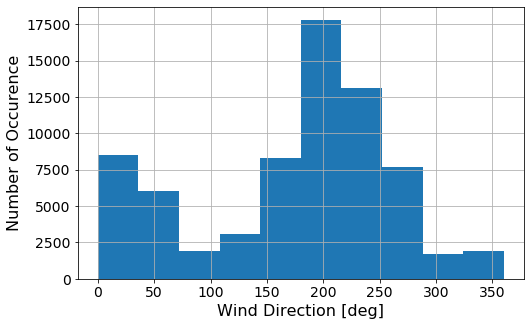

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, figsize=(8, 5))
plt.hist(df['wd (deg)'])
plt.xlabel('Wind Direction [deg]', fontsize=16)
plt.ylabel('Number of Occurence', fontsize=16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.grid()

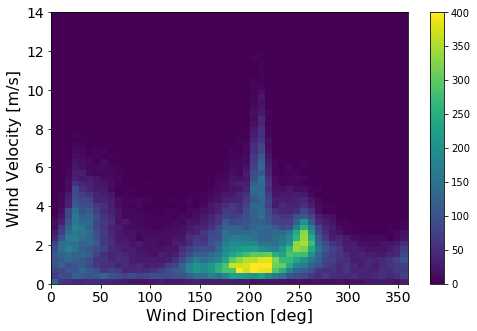

In [27]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, figsize=(8, 5))
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]', fontsize=16)
plt.ylabel('Wind Velocity [m/s]', fontsize=16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)